In [1]:
# run stopwatch
from tools import Stopwatch
stopwatch = Stopwatch()
start = stopwatch.start()

### Load libraries, functions, palette, theme

In [2]:
%run _libraries.ipynb

In [3]:
%run _functions.ipynb

# Section I. Overview

## Load Saved Section if exists

## Load Data

In [4]:
data_raw = pd.read_csv('data/powerconsumption.csv')

In [5]:
data_raw.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


#### Transform names

In [6]:
data_raw = data_raw.rename(columns={
    'PowerConsumption_Zone1': 'target1',
    'PowerConsumption_Zone2': 'target2',
    'PowerConsumption_Zone3': 'target3'
})

In [7]:
data_raw.columns = map(str.lower, data_raw.columns)

#### Date to index

In [8]:
data_raw['datetime'] = pd.to_datetime(data_raw['datetime'])

In [9]:
data_raw = data_raw.set_index(data_raw['datetime'], drop=True)

In [10]:
data_raw.index.name = None

In [11]:
data_raw = data_raw.drop(columns='datetime')

#### Check duplicates

In [12]:
data_raw[data_raw.duplicated()]

,temperature,humidity,windspeed,generaldiffuseflows,diffuseflows,target1,target2,target3


## Data Split

In [13]:
data_raw.shape

(52416, 8)

In [14]:
train = data_raw.loc['2017-04': '2017-07'].copy()

In [15]:
valid = data_raw.loc['2017-08'].copy()

In [16]:
test = data_raw.loc['2017-09'].copy()

In [17]:
train.shape

(17568, 8)

In [18]:
valid.shape

(4464, 8)

In [19]:
test.shape

(4320, 8)

## Explore

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17568 entries, 2017-04-01 00:00:00 to 2017-07-31 23:50:00
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperature          17568 non-null  float64
 1   humidity             17568 non-null  float64
 2   windspeed            17568 non-null  float64
 3   generaldiffuseflows  17568 non-null  float64
 4   diffuseflows         17568 non-null  float64
 5   target1              17568 non-null  float64
 6   target2              17568 non-null  float64
 7   target3              17568 non-null  float64
dtypes: float64(8)
memory usage: 1.2 MB


In [21]:
data_describe(train)

,Type,Count,Unique,NaN,Percentages
temperature,float64,17568,2389,0,0
humidity,float64,17568,3732,0,0
windspeed,float64,17568,174,0,0
generaldiffuseflows,float64,17568,5910,0,0
diffuseflows,float64,17568,6093,0,0
target1,float64,17568,8645,0,0
target2,float64,17568,10894,0,0
target3,float64,17568,9052,0,0


In [22]:
train.describe()

,temperature,humidity,windspeed,generaldiffuseflows,diffuseflows,target1,target2,target3
count,17568.000000,17568.000000,17568.000000,17568.000000,17568.000000,17568.000000,17568.000000,17568.000000
mean,21.557630,67.454427,2.201019,252.164427,96.620113,33510.768175,20631.371047,21237.662735
std,5.027176,17.464730,2.399470,316.968276,138.072108,7138.352746,4966.213004,6880.889438
min,10.250000,11.340000,0.050000,0.004000,0.037000,16814.983850,8560.081466,9840.971660
25%,17.817500,56.200000,0.072000,0.070000,0.133000,27638.154787,16742.933362,16294.736840
50%,21.090000,70.400000,0.083000,61.150000,42.410000,33711.099210,20690.835030,19223.272730
75%,24.700000,82.600000,4.916000,506.675000,138.600000,38501.721850,23895.175070,25995.674638
max,40.010000,93.100000,4.937000,1163.000000,909.000000,51540.199340,37408.860760,47598.326360


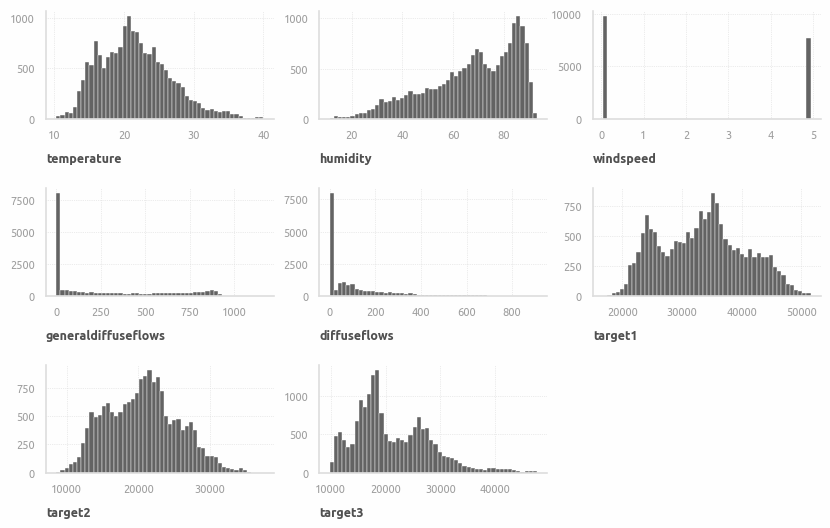

In [23]:
f = plot_gridplot(
    data=train,
    features=train.columns,
    figsize=(10,6),
    ncols=3,
    kind='hist',
    plot_shape='rectangle',
    hscale=1.6,
    histplot_kwargs={'bins': 50})

### Variables lists

In [24]:
features = [
    'temperature', 'humidity', 'windspeed',
    'generaldiffuseflows', 'diffuseflows'
]

In [25]:
months_list = ['April', 'May', 'June', 'July']

### Datetime features

In [26]:
train['minute'] = train.index.minute

In [27]:
train['hour'] = train.index.hour

In [28]:
train['day'] = train.index.day

In [29]:
# day numbers since beginning of dataset
train['day_number'] = train.index.day_of_year - train.index.day_of_year.min() + 1

In [30]:
train['day_of_year'] = train.index.day_of_year

In [31]:
train['weekday'] = train.index.weekday

In [32]:
train['week'] = train.index.isocalendar().week

In [33]:
train['month'] = train.index.month

In [34]:
train["year_month"] = train.index.to_period('M')

In [35]:
train["year_day"] = train.index.to_period('d')

In [36]:
train['count_elmnts_by_day'] = train.groupby('day_of_year').cumcount() + 1

In [37]:
train.head()

,temperature,humidity,windspeed,generaldiffuseflows,diffuseflows,target1,target2,target3,minute,hour,day,day_number,day_of_year,weekday,week,month,year_month,year_day,count_elmnts_by_day
2017-04-01 00:00:00,16.76,86.2,0.075,0.029,0.108,28471.38859,16845.21385,17454.54545,0,0,1,1,91,5,13,4,2017-04,2017-04-01,1
2017-04-01 00:10:00,16.78,86.2,0.072,0.026,0.119,28099.37567,16566.59878,17192.72727,10,0,1,1,91,5,13,4,2017-04,2017-04-01,2
2017-04-01 00:20:00,16.80,86.3,0.071,0.029,0.082,27640.55974,16101.01833,17070.54545,20,0,1,1,91,5,13,4,2017-04,2017-04-01,3
2017-04-01 00:30:00,16.77,86.4,0.075,0.048,0.115,27032.93864,15910.38697,16704.00000,30,0,1,1,91,5,13,4,2017-04,2017-04-01,4
2017-04-01 00:40:00,16.77,86.5,0.074,0.037,0.108,26549.32185,15499.79633,16541.09091,40,0,1,1,91,5,13,4,2017-04,2017-04-01,5


### Measurements frequencies check

In [38]:
train.groupby('day_number').size().sort_values()

day_number
1      144
89     144
88     144
87     144
86     144
      ... 
35     144
34     144
33     144
31     144
122    144
Length: 122, dtype: int64

In [39]:
# assert if daily measurements frequencies not equals
assert (train.groupby('day_number').size().sort_values().min() ==
        train.groupby('day_number').size().sort_values().max())

### Target Variable

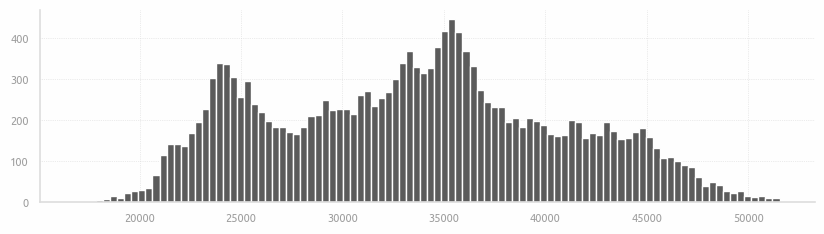

In [40]:
plt.hist(train['target1'], bins=100);

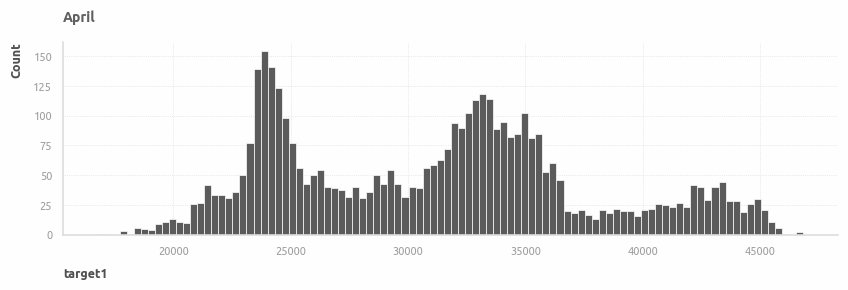

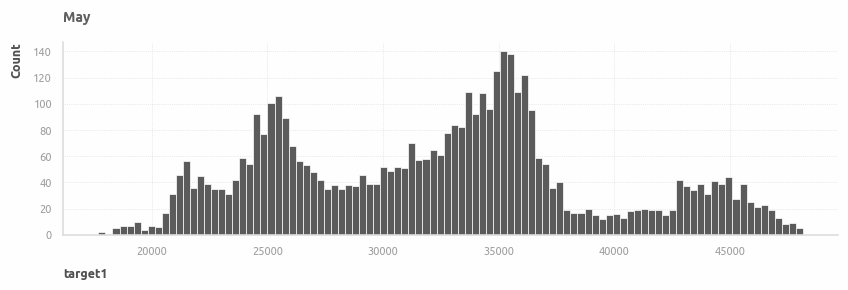

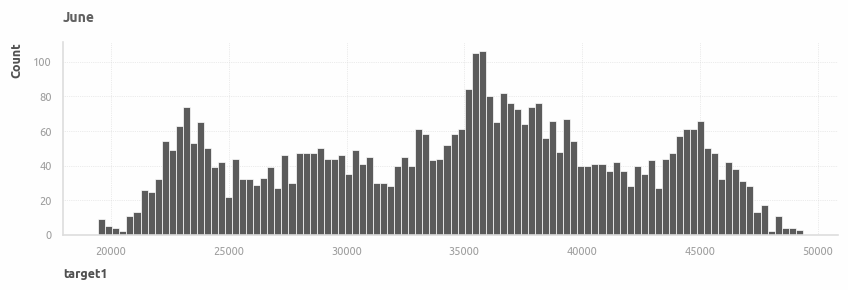

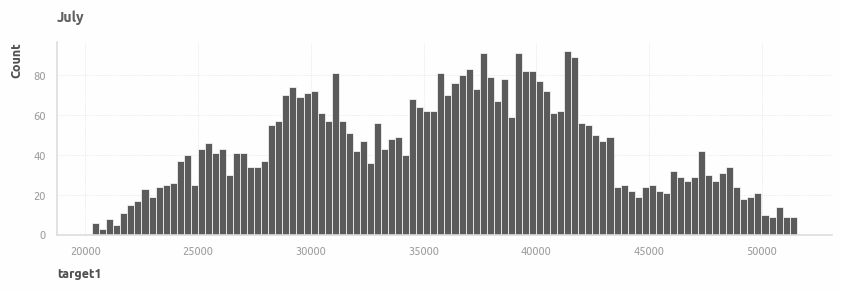

In [41]:
for i, m in zip(train['month'].unique(), months_list):
    sns.histplot(
        data=train[train['month']==i],
        x='target1',
        bins=100,
        alpha=1
    );
    plt.title(m)
    plt.show()

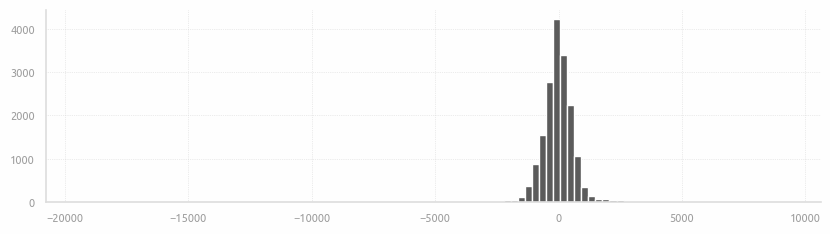

In [42]:
plt.hist(train['target1'].diff(), bins=100);

## Naive Model

##### Predictions

In [43]:
y_pred_naive = train['target1'].shift(1).copy()

##### MAE

In [44]:
mean_absolute_error(train['target1'][1:], y_pred_naive[1:])

455.2174010155405

##### MAPE

In [45]:
mean_absolute_percentage_error(train['target1'][1:], y_pred_naive[1:]) * 100

1.392995554018979

##### RMSE

In [46]:
root_mean_squared_log_error(train['target1'][1:], y_pred_naive[1:])

0.02045008340243255

## Target1: Discretization and Visualization

### Full Distance with Monthly mean

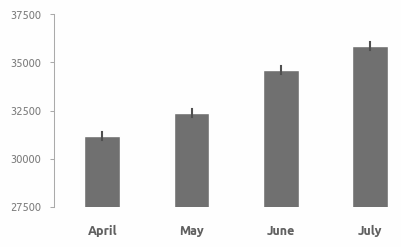

In [114]:
fig = plt.figure(figsize=(4, 2.5))

sns.barplot(
    data=train,
    x='month',
    y='target1',
    errorbar=('ci'),
    width=0.4,
    color=palette[-3],
    err_kws=dict(color=palette[-4])
);
plt.xticks(arange(4), months_list)
axis_rstyle(
    offset_bottom=10, offset_left=20,
    ylim=[27500, 37500], yticks=[27500, 37500, 2500]
)
spines_adjust_barplot(weight='bold')
ax_current().spines['bottom'].set_visible(False)
plt.tick_params(axis='x', labelsize=9, pad=0, labelcolor='#606060')

plt.xlabel(None)
plt.ylabel(None)
plt.show()

### Full Distance with Weekly mean

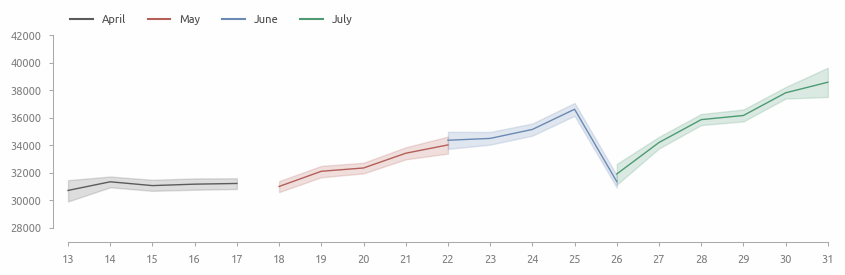

In [48]:
sns.lineplot(
    data=train,
    x='week',
    y='target1',
    hue='month',
    errorbar=('ci'),
    palette=palette[:4]
);
maxnloc = mpl.ticker.MaxNLocator(nbins=len(train['week'].unique())+1, integer=True)
ax_current().xaxis.set_major_locator(maxnloc)
axis_rstyle(xslice=[1, -1], grid=False)
plt.legend(**legend_inline(), **legend_create_handles(labels=months_list))

plt.xlabel(None)
plt.ylabel(None)
plt.show()

### Full Distance with Daily mean

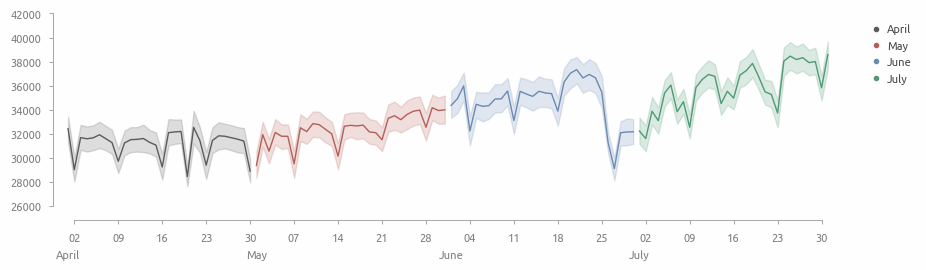

In [49]:
fig = plt.figure()

sns.lineplot(
    data=train,
    x=train.index.to_period('d').to_timestamp(),
    y='target1',
    hue='month',
    palette=[palette[0], palette[1], palette[2], palette[3]],
)

ax = ax_current()
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%d'))
ax.xaxis.set_major_locator(mpl.dates.WeekdayLocator(byweekday=mpl.dates.SU, interval=1))

ax1 = ax.secondary_xaxis('bottom')
ax1.spines['bottom'].set_position(('outward', 23))
ax1.spines['bottom'].set_visible(False)
ax1.tick_params(bottom=False, labelcolor='#808080')
ax1.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt='%B'))
ax1.xaxis.set_major_locator(mpl.dates.MonthLocator([4, 5, 6, 7]))

axis_rstyle(xslice=[1,-1], grid=False)

plt.legend(
    **legend_mid(bbox_to_anchor=(1.025, 1)),
    **legend_create_handles(kind='point', labels=months_list))
plt.xlabel(None)
plt.ylabel(None)

plt.show()

##### Anomaly #1
2017-06-25 : 2017-07-02

- Diif in 'diffuseflows' first looks suspicious, but after detail check the decision is - it's not the reason of animaly.
- Generally, don't looks like an accident. Volatility and returns not extreme. Other targets demonstrates similar behavior over this time preiod.

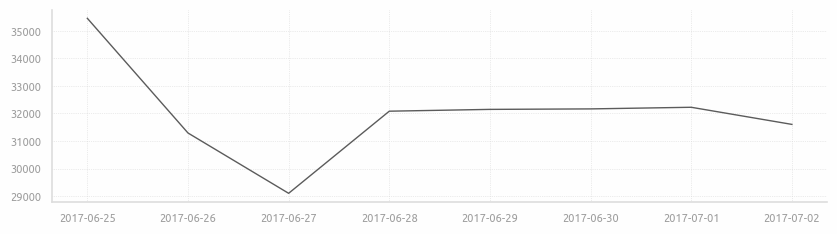

In [50]:
plt.plot(
    train.loc['2017-06-25': '2017-07-02'].groupby('year_day').mean().to_timestamp().index,
    train.loc['2017-06-25': '2017-07-02'].groupby('year_day').mean()['target1']
);

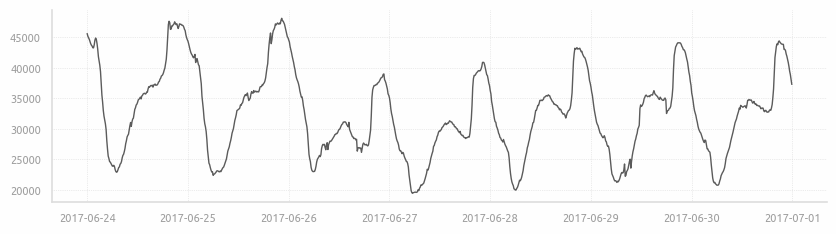

In [51]:
plt.plot(
    train.loc['2017-06-24': '2017-06-30'].index,
    train.loc['2017-06-24': '2017-06-30']['target1']
);

In [52]:
train.loc['2017-06-25': '2017-07-02'].groupby('year_day').mean()

,temperature,humidity,windspeed,generaldiffuseflows,diffuseflows,target1,target2,target3,minute,hour,day,day_number,day_of_year,weekday,week,month,year_month,count_elmnts_by_day
year_day,,,,,,,,,,,,,,,,,,
2017-06-25,22.519444,74.670417,4.919229,325.884083,80.436958,35451.655629,19653.586279,23210.994872,25.0,11.5,25.0,86.0,176.0,6.0,25.0,6.0,2017-06,72.5
2017-06-26,22.781319,79.095000,4.918292,312.278069,68.290813,31291.655629,17968.607068,22729.558974,25.0,11.5,26.0,87.0,177.0,0.0,26.0,6.0,2017-06,72.5
2017-06-27,23.389097,74.605833,4.918736,303.680799,79.984764,29103.664459,17486.174636,21924.020512,25.0,11.5,27.0,88.0,178.0,1.0,26.0,6.0,2017-06,72.5
2017-06-28,24.610972,63.647431,4.919729,314.268486,89.035708,32082.472407,20169.178794,22212.471795,25.0,11.5,28.0,89.0,179.0,2.0,26.0,6.0,2017-06,72.5
2017-06-29,24.862153,67.613681,3.867479,301.092646,96.094549,32148.079470,20005.899168,22661.333333,25.0,11.5,29.0,90.0,180.0,3.0,26.0,6.0,2017-06,72.5
2017-06-30,24.459722,63.917847,4.918771,299.287326,99.210326,32165.607064,20982.770270,22621.333333,25.0,11.5,30.0,91.0,181.0,4.0,26.0,6.0,2017-06,72.5
2017-07-01,25.457153,55.706667,4.919472,308.092153,86.462757,32224.629014,21104.456751,24162.384937,25.0,11.5,1.0,92.0,182.0,5.0,26.0,7.0,2017-07,72.5
2017-07-02,24.365625,74.000000,4.919465,301.717632,96.224194,31603.809524,19498.786920,24409.372385,25.0,11.5,2.0,93.0,183.0,6.0,26.0,7.0,2017-07,72.5


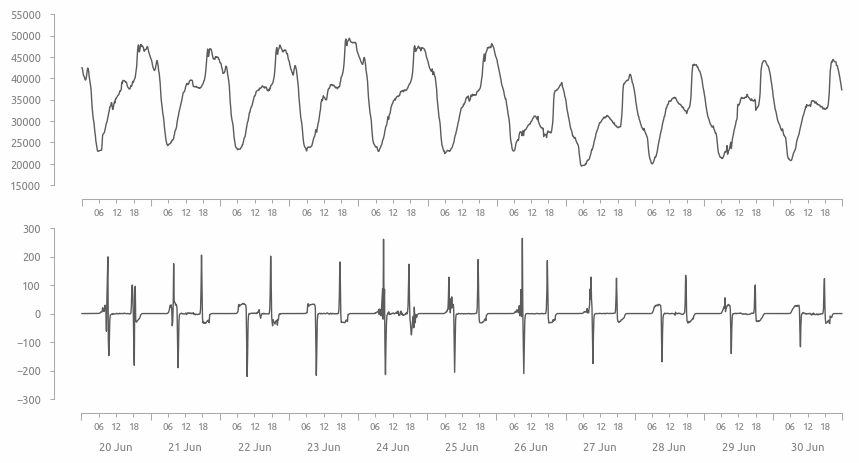

In [118]:
fig = plt.figure(figsize=(10, 5))

maxticks = 200
slice_anomaly1 = slice('2017-06-20', '2017-06-30')
byhour_major = [0]
byhour_minor = [6, 12, 18]
fmttime = '%H'

plt.subplot(2, 1, 1)
plt.plot(
    train.loc[slice_anomaly1].index,
    train.loc[slice_anomaly1]['target1']
);

ax = ax_current()
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt=fmttime))
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter(fmt=fmttime))
ax.xaxis.set_major_locator(mpl.dates.HourLocator(byhour=byhour_major))
ax.xaxis.set_minor_locator(mpl.dates.HourLocator(byhour=byhour_minor))

axis_rstyle(offset_left=15)
ax.tick_params(which='major', axis='x', labelbottom=False, length=5)
ax.tick_params(which='minor', labelsize=7)

plt.subplot(2, 1, 2)
plt.plot(
    train.loc[slice_anomaly1]['diffuseflows'].diff()
)

ax = ax_current()
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter(fmt=fmttime))
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter(fmt=fmttime))
ax.xaxis.set_major_locator(mpl.dates.HourLocator(byhour=byhour_major))
ax.xaxis.set_minor_locator(mpl.dates.HourLocator(byhour=byhour_minor))

ax1 = ax.secondary_xaxis('bottom')
ax1.spines['bottom'].set_position(('outward', 23))
ax1.spines['bottom'].set_visible(False)
ax1.xaxis.set_major_formatter(mpl.dates.DateFormatter('%d %b'))
ax1.xaxis.set_major_locator(mpl.dates.HourLocator(12))
ax1.tick_params(axis='x', bottom=False, labelcolor='#808080')

axis_rstyle(offset_left=15)
ax.tick_params(which='major', axis='x', labelbottom=False, length=5)
ax.tick_params(which='minor', labelsize=7)

plt.subplots_adjust(hspace=0.25)
plt.show()

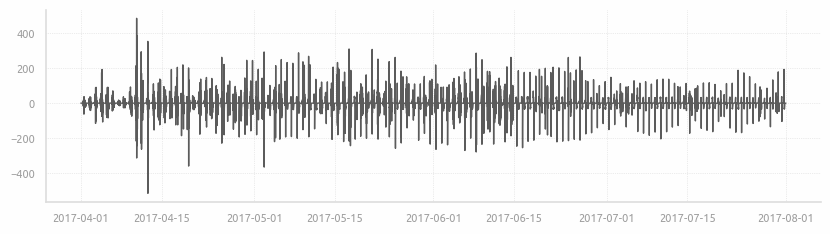

In [54]:
plt.plot(
    train.index,
    train['diffuseflows'].diff()
);

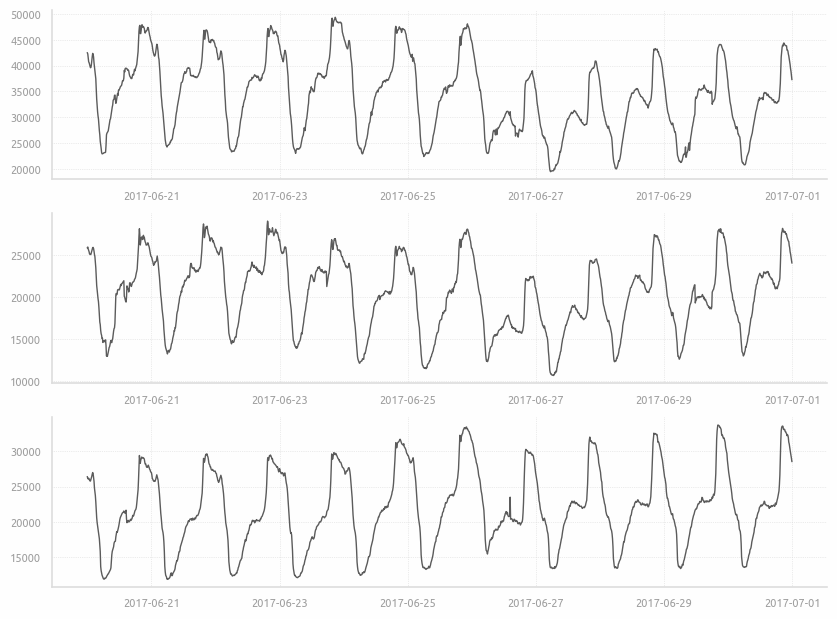

In [119]:
fig, ax = plt.subplots(3,1, figsize=(10, 7.5))

for i, v in enumerate(['target1', 'target2', 'target3']):
    ax[i].plot(
        train.loc[slice_anomaly1].index,
        train.loc[slice_anomaly1][v]
    );

### By Months with Daily mean

#### April

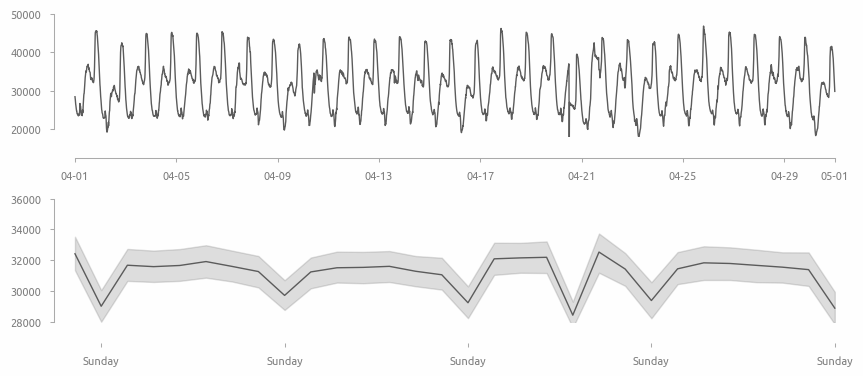

In [55]:
fig, ax = plt.subplots(2,1, figsize=(10, 4), sharex=False)

# plt.subplot(2, 1, 1)
ax[0].plot(train[train['month']==4].index,
    train[train['month']==4]['target1'],
    color=palette[0]
);
fmt = mpl.dates.DateFormatter('%m-%d')
ax[0].xaxis.set_major_formatter(fmt)

axis_rstyle(
    offset_bottom=15, offset_left=10,
    yticks=[20000, 50000, 10000], ylim=[18000, 50000],
    grid=False, ax=ax[0]
)
    
sns.lineplot(
    data=train[train['month']==4],
    x='day',
    y='target1',
    color=palette[0],
    ax=ax[1]
);

ax[1].set_xticks(arange(2, 30, 7, True), labels=['Sunday']*5)
ax[1].set_xticks(arange(2, 30, 7, True))

axis_rstyle(
    ax=ax[1], offset_bottom=15, offset_left=10, 
    yticks=[28000, 36000, 2000], ylim=[28000, 36000],
    grid=False, x_spine_hide=True
)

plt.xlabel(None)
plt.ylabel(None)

plt.subplots_adjust(hspace=0.5)
plt.show()

#### May

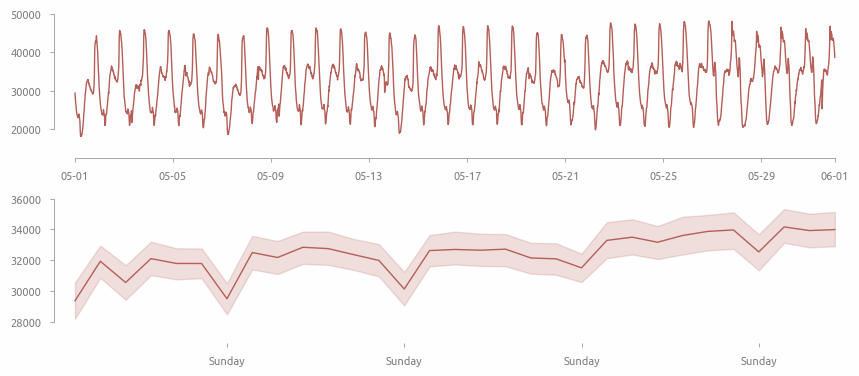

In [56]:
fig, ax = plt.subplots(2,1, figsize=(10, 4), sharex=False)

# plt.subplot(2, 1, 1)
ax[0].plot(train[train['month']==5].index,
    train[train['month']==5]['target1'],
    color=palette[1]
);
fmt = mpl.dates.DateFormatter('%m-%d')
ax[0].xaxis.set_major_formatter(fmt)

axis_rstyle(
    offset_bottom=15, offset_left=10,
    yticks=[20000, 50000, 10000], ylim=[18000, 50000],
    grid=False, ax=ax[0]
)
    
sns.lineplot(
    data=train[train['month']==5],
    x='day',
    y='target1',
    color=palette[1],
    ax=ax[1]
);
multloc = mpl.ticker.MultipleLocator(base=7, offset=0)
ax[1].xaxis.set_major_locator(multloc)
ax[1].set_xticks(arange(7, 31, 7, True), labels=['Sunday']*4)

axis_rstyle(
    ax=ax[1], offset_bottom=15, offset_left=10, 
    yticks=[28000, 36000, 2000], ylim=[28000, 36000],
    grid=False, x_spine_hide=True
)

plt.xlabel(None)
plt.ylabel(None)

plt.subplots_adjust(hspace=0.5)
plt.show()

#### June

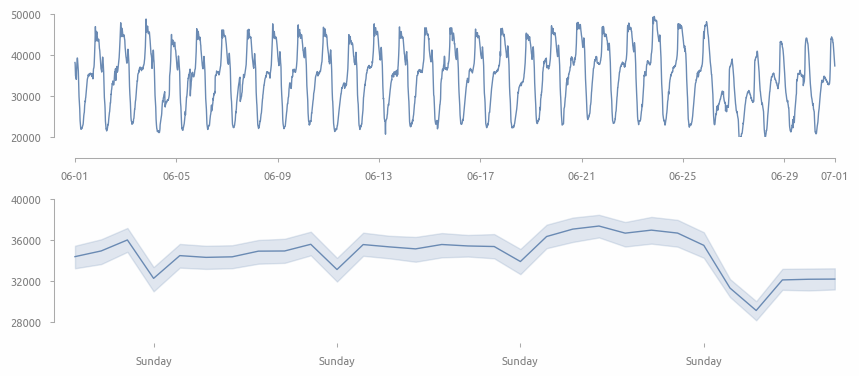

In [57]:
fig, ax = plt.subplots(2,1, figsize=(10, 4), sharex=False)

# plt.subplot(2, 1, 1)
ax[0].plot(train[train['month']==6].index,
    train[train['month']==6]['target1'],
    color=palette[2]
);
fmt = mpl.dates.DateFormatter('%m-%d')
ax[0].xaxis.set_major_formatter(fmt)

axis_rstyle(
    offset_bottom=15, offset_left=10,
    yticks=[20000, 50000, 10000], ylim=[20000, 50000],
    grid=False, ax=ax[0]
)
    
sns.lineplot(
    data=train[train['month']==6],
    x='day',
    y='target1',
    color=palette[2],
    ax=ax[1]
);
multloc = mpl.ticker.MultipleLocator(base=7, offset=0)
ax[1].xaxis.set_major_locator(multloc)
ax[1].set_xticks(arange(4, 30, 7, True), labels=['Sunday']*4)

axis_rstyle(
    ax=ax[1], offset_bottom=15, offset_left=10, 
    yticks=[28000, 40000, 4000], ylim=[28000, 40000],
    grid=False, x_spine_hide=True
)

plt.xlabel(None)
plt.ylabel(None)

plt.subplots_adjust(hspace=0.5)
plt.show()

#### July

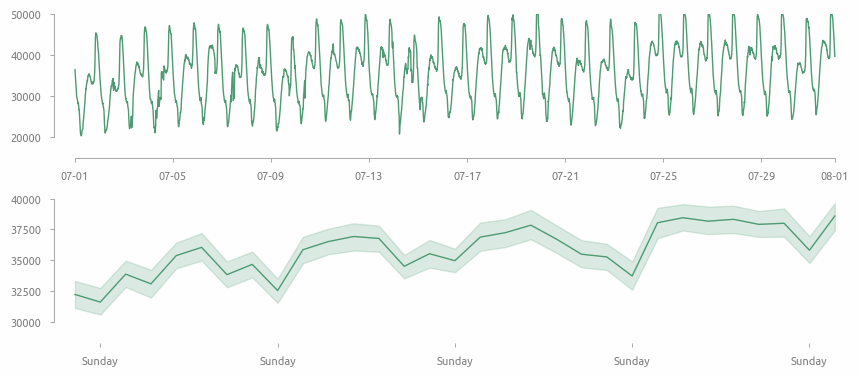

In [58]:
fig, ax = plt.subplots(2,1, figsize=(10, 4), sharex=False)

# plt.subplot(2, 1, 1)
ax[0].plot(train[train['month']==7].index,
    train[train['month']==7]['target1'],
    color=palette[3]
);
fmt = mpl.dates.DateFormatter('%m-%d')
ax[0].xaxis.set_major_formatter(fmt)

axis_rstyle(
    offset_bottom=15, offset_left=10,
    yticks=[20000, 50000, 10000], ylim=[20000, 50000],
    grid=False, ax=ax[0]
)

sns.lineplot(
    data=train[train['month']==7],
    x='day',
    y='target1',
    color=palette[3],
    ax=ax[1]
);
multloc = mpl.ticker.MultipleLocator(base=7, offset=0)
ax[1].xaxis.set_major_locator(multloc)
ax[1].set_xticks(arange(2, 30, 7, True), labels=['Sunday']*5)

axis_rstyle(
    ax=ax[1], offset_bottom=15, offset_left=10, 
    yticks=[30000, 40000, 2500], ylim=[30000, 40000],
    grid=False, x_spine_hide=True
)

plt.xlabel(None)
plt.ylabel(None)

plt.subplots_adjust(hspace=0.5)
plt.show()

### Weekdays mean

Create additional features: is_Friday and is_Sunday

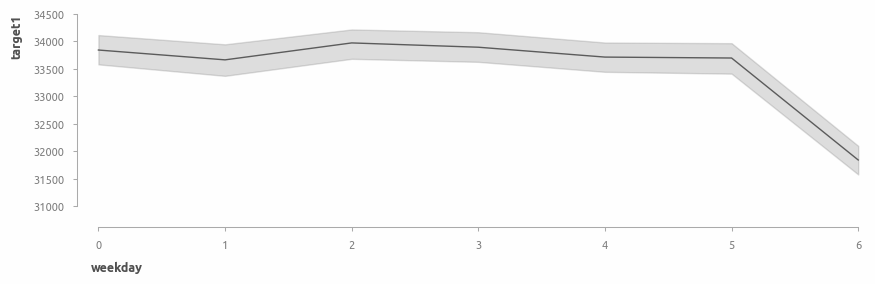

In [59]:
sns.lineplot(
    x=train['weekday'],
    y=train['target1']
);
axis_rstyle(xslice=[1,-1], offset_bottom=15, offset_left=10)

In [60]:
weekdays = np.sort(train['weekday'].unique())

In [61]:
ncols = 2
nrows = math.ceil(len(weekdays)/ncols)

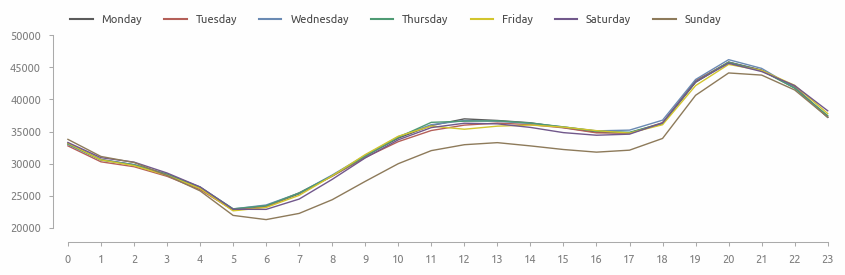

In [62]:
fig = plt.figure()
for i, v in enumerate(weekdays):
    plt.plot(
        train[train['weekday']==v].groupby('hour').mean().index,
        train[train['weekday']==v].groupby('hour').mean()['target1'],
        color=palette[v], lw=1, label=weekday_names_dict[v]
    )
leg = plt.legend(**legend_inline())
for l in leg.legend_handles:
    l.set_linewidth(1.5)
axis_rstyle(xticks=[0, 23, 1])

#### Features 'is_Friday' and 'is_Sunday'

In [63]:
train['is_Friday'] = (train['weekday']==4).astype(int)

In [64]:
train['is_Sunday'] = (train['weekday']==6).astype(int)

### Days mean

- Create additional feature: is_31  
- Anomaly suspect near 2017-06-25

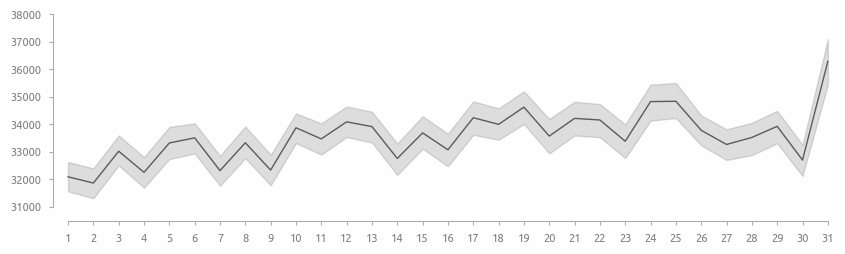

In [65]:
sns.lineplot(
    x=train['day'],
    y=train['target1'],
    )
plt.xticks(train.groupby('day').mean().index)
plt.xlabel(None)
plt.ylabel(None)
axis_rstyle()

plt.show()

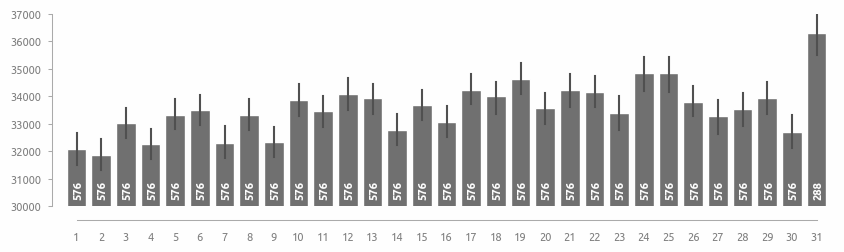

In [66]:
sns.barplot(
    data=train,
    x='day',
    y='target1',
    color=palette[-3],
    err_kws={'color': palette[-4]}
)
ax = plt.gca()
ax.set_ylim(30000, 37000)
ax.set_xlabel(None)
ax.set_ylabel(None)

els_count = train.groupby('day').count().iloc[:, 0]
for bar, count in zip(ax.patches, els_count):
    ax.text(
        bar.get_x()+bar.get_width()/1.75, 30250, count,
        size=8,  color='#FEFEFE', weight='bold',
        ha='center', va='bottom', rotation=90) 

axis_rstyle()
ax.tick_params(bottom=False, pad=5)

#### Feature 'is_31'

In [67]:
train['is_31'] = (train['day']==31).astype(int)

#### Daily

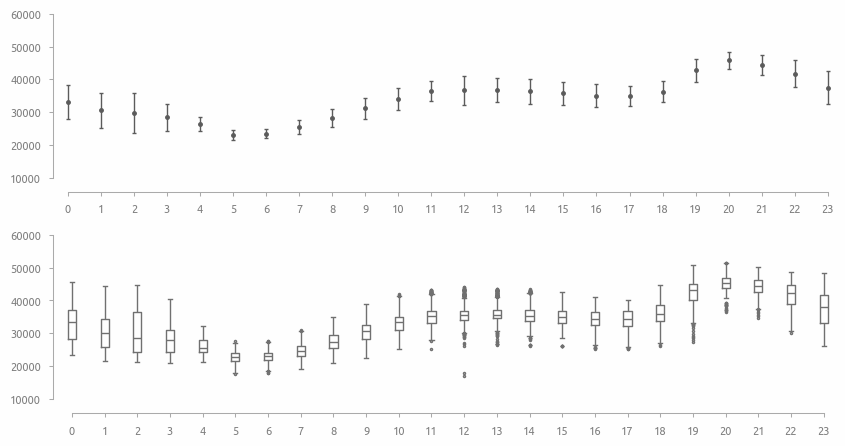

In [116]:
fig, ax = plt.subplots(2, 1, figsize=(10, 5))

ax[0].errorbar(
    range(len(train[train['weekday']==3].groupby('hour').mean())),
    train[train['weekday']==3].groupby('hour').mean()['target1'],
    train[train['weekday']==3].groupby('hour')['target1'].std(),
    ls='none',
    marker='o',
    markersize=2.5,
    lw=1,
    capsize=1.5
);
axis_rstyle(
    ax=ax[0], xticks=[0, 23, 1], yticks=[10000, 60000, 10000],
    margin=True)
ax[0].set_ylim(10000, 60000)

sns.boxplot(
    y=train['target1'],
    x=train['hour'],
    width=0.25,
    fill=False,
    linewidth=1,
    color=palette[-3],
    flierprops=dict(markersize=1.5),
    ax=ax[1]
)
axis_rstyle(
    ax=ax[1], xticks=[0, 23, 1], yticks=[10000, 60000, 10000],
    margin=True)
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].set_ylim(10000, 60000)

plt.subplots_adjust(hspace=0.35)
plt.show()

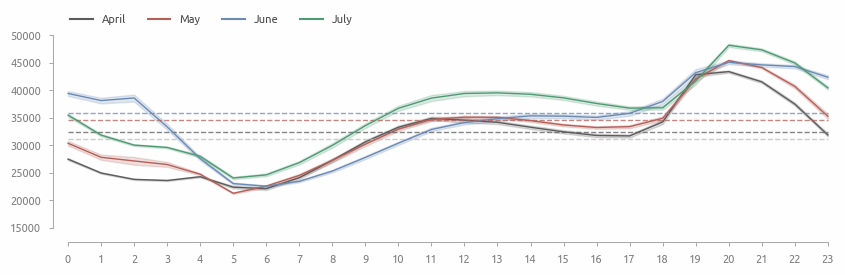

In [69]:
fig = plt.figure()
for i in arange(4,7, True):
    sns.lineplot(
        x=train.loc[f'2017-{str(i).zfill(2)}']['hour'],
        y=train.loc[f'2017-{str(i).zfill(2)}']['target1'],
        color=palette[i-4],
        label=i
    )
    plt.axhline(
        train.loc[f'2017-{str(i).zfill(2)}']['target1'].mean(),
        0.01, 0.99, ls='--', alpha=0.75, color=palette[i-5])
    
plt.xticks(range(24))
plt.legend(**legend_create_handles(labels=months_list), **legend_inline())
axis_rstyle()

plt.xlabel(None)
plt.ylabel(None)

plt.show()

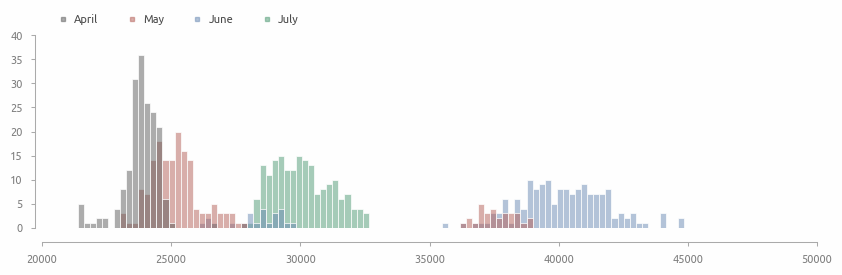

In [70]:
sns.histplot(
    x=train[train['hour']==2]['target1'],
    hue=train[train['hour']==2]['year_month'],
    bins=100
)
plt.legend(
    **legend_create_handles(
        4, kind='rect', alpha=0.5, labels=months_list),
    **legend_inline(4))
axis_rstyle()

plt.xlabel(None)
plt.ylabel(None)

plt.show()

## Stationarity

p< 0.05: Enough evidence to say, that process is stationarity

In [71]:
# NULL: non-stationarity
sm.tsa.stattools.adfuller(train['target1'])

(-20.28639378119461,
 0.0,
 43,
 17524,
 {'1%': -3.4307232171961304,
  '5%': -2.861704947599971,
  '10%': -2.5668577973233537},
 266166.218428815)

## Trend and Seasonality of aggregated by Day data

In [72]:
stl_day = statsmodels.tsa.seasonal.STL(train.resample('d').mean()['target1']).fit()

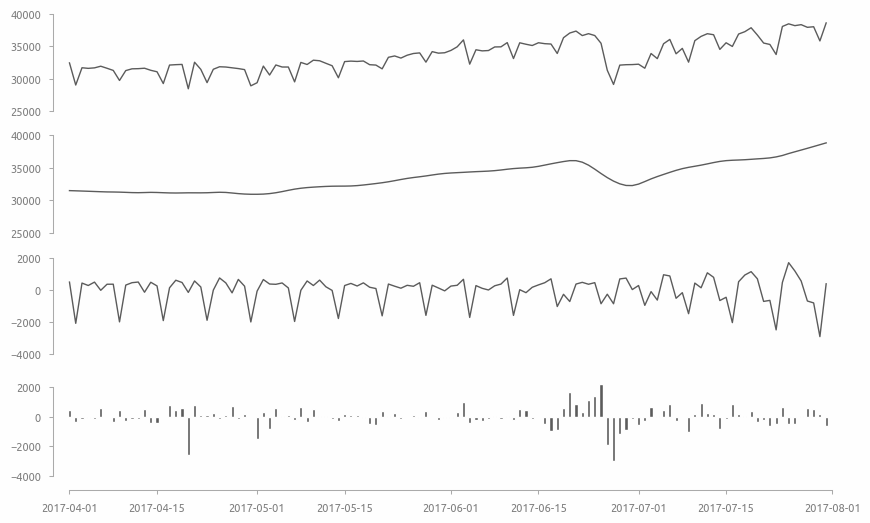

In [73]:
fig, ax = plt.subplots(4, 1, figsize=(10, 6), sharex=True)

ax[0].plot(stl_day.observed)
axis_rstyle(ax=ax[0], yticks=[25000, 40000, 5000])
ax[0].spines['bottom'].set_visible(False)
ax[0].tick_params(bottom=False)

ax[1].plot(stl_day.trend)
axis_rstyle(ax=ax[1], yticks=[25000, 40000, 5000])
ax[1].spines['bottom'].set_visible(False)
ax[1].tick_params(bottom=False)

ax[2].plot(stl_day.seasonal)
axis_rstyle(ax=ax[2], yticks=[-4000, 2000, 2000])
ax[2].spines['bottom'].set_visible(False)
ax[2].tick_params(bottom=False)

ax[3].bar(x=train.resample('D').mean().index, height=stl_day.resid, width=0.5)
axis_rstyle(ax=ax[3], yticks=[-4000, 2000, 2000])

plt.subplots_adjust(hspace=0.25)
plt.show()

#### Detrending

##### Differencing

In [74]:
train['target1_diff'] = train['target1'].diff().copy()

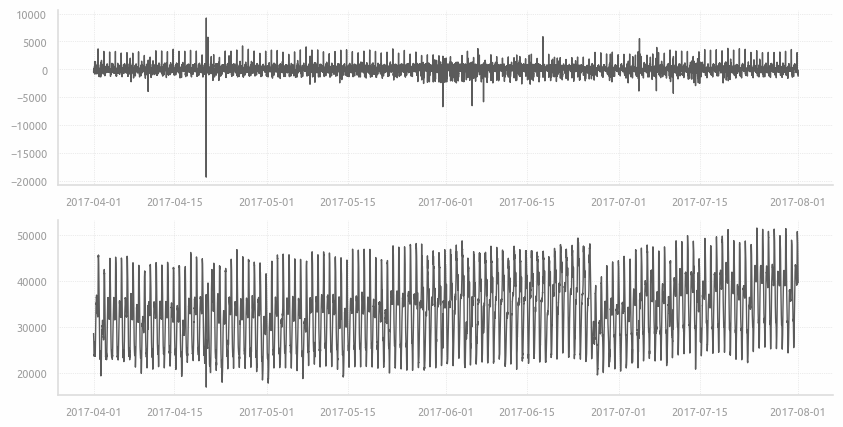

In [75]:
fig = plt.figure(figsize=(10, 5))

plt.subplot(2,1,1)
plt.plot(
    train.index,
    train['target1_diff']
);
plt.subplot(2,1,2)
plt.plot(
    train.index,
    train['target1']
);

##### Returns

In [76]:
train['target1_returns'] = train['target1'].pct_change(1).mul(100)

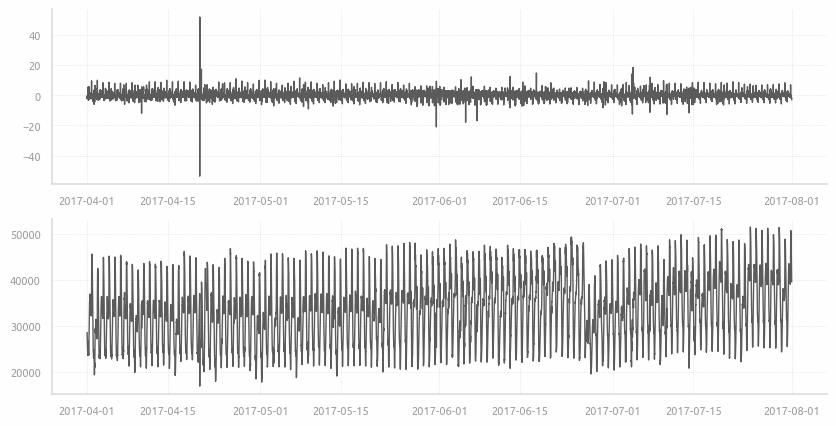

In [77]:
fig = plt.figure(figsize=(10, 5))

plt.subplot(2,1,1)
plt.plot(
    train.index,
    train['target1_returns']
);
plt.subplot(2,1,2)
plt.plot(
    train.index,
    train['target1']
);

##### Volatility

In [78]:
train['target1_volatility'] = (train['target1_returns']**2).copy()

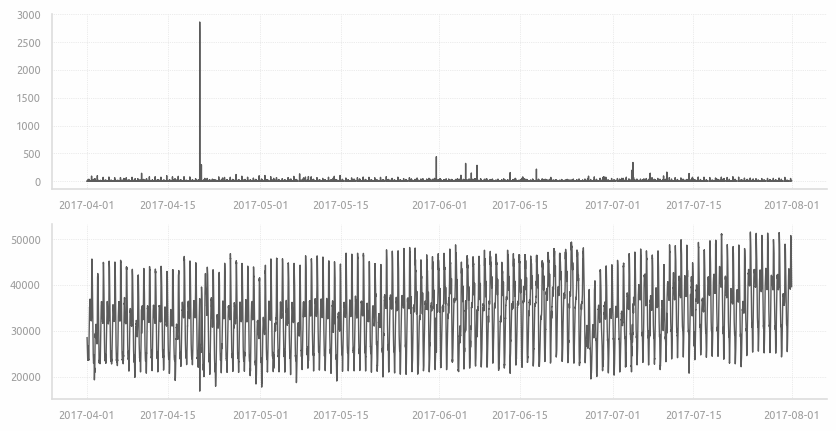

In [79]:
fig = plt.figure(figsize=(10, 5))

plt.subplot(2,1,1)
plt.plot(
    train.index,
    train['target1_volatility']
);
plt.subplot(2,1,2)
plt.plot(
    train.index,
    train['target1']
);

##### Anomaly #2

index: 2017-04-20 12:10:00  
volatility: 2862.029840

In [80]:
train['target1_volatility'].sort_values()

2017-04-27 01:40:00       0.000000
2017-05-24 17:50:00       0.000000
2017-07-25 18:00:00       0.000000
2017-05-25 12:20:00       0.000000
2017-05-25 15:20:00       0.000000
                          ...     
2017-07-04 12:30:00     334.726302
2017-05-31 11:30:00     438.955206
2017-04-20 12:30:00    2673.646637
2017-04-20 12:10:00    2862.029840
2017-04-01 00:00:00            NaN
Name: target1_volatility, Length: 17568, dtype: float64

In [81]:
train.loc['2017-04-20 11:40':'2017-04-20 13:0']

,temperature,humidity,windspeed,generaldiffuseflows,diffuseflows,target1,target2,target3,minute,hour,...,month,year_month,year_day,count_elmnts_by_day,is_Friday,is_Sunday,is_31,target1_diff,target1_returns,target1_volatility
2017-04-20 11:40:00,15.89,86.3,0.071,117.0,94.30,36544.06889,21775.96741,18885.81818,40,11,...,4,2017-04,2017-04-20,71,0,0,0,446.41550,1.236688,1.529398
2017-04-20 11:50:00,15.91,86.2,0.069,122.4,101.50,37015.28525,21585.33605,19095.27273,50,11,...,4,2017-04,2017-04-20,72,0,0,0,471.21636,1.289447,1.662673
2017-04-20 12:00:00,15.93,85.9,0.067,119.8,98.60,36159.65554,21526.68024,19130.18182,0,12,...,4,2017-04,2017-04-20,73,0,0,0,-855.62971,-2.311558,5.343299
2017-04-20 12:10:00,15.85,85.4,0.068,96.5,80.40,16814.98385,21471.69043,19450.18182,10,12,...,4,2017-04,2017-04-20,74,0,0,0,-19344.67169,-53.497942,2862.029840
2017-04-20 12:20:00,15.90,85.7,0.067,99.7,84.80,17794.61787,21563.34012,19781.81818,20,12,...,4,2017-04,2017-04-20,75,0,0,0,979.63402,5.825959,33.941795
2017-04-20 12:30:00,15.87,85.1,0.072,142.3,119.30,26995.73735,21999.59267,19886.54545,30,12,...,4,2017-04,2017-04-20,76,0,0,0,9201.11948,51.707317,2673.646637
2017-04-20 12:40:00,15.96,84.5,0.070,154.0,127.50,26822.13132,25533.60489,19671.27273,40,12,...,4,2017-04,2017-04-20,77,0,0,0,-173.60603,-0.643087,0.413561
2017-04-20 12:50:00,16.09,83.3,0.073,118.8,97.50,26226.91066,30024.43992,19653.81818,50,12,...,4,2017-04,2017-04-20,78,0,0,0,-595.22066,-2.219140,4.924583
2017-04-20 13:00:00,16.22,83.2,0.071,74.2,59.87,26685.72659,30017.10794,19618.90909,0,13,...,4,2017-04,2017-04-20,79,0,0,0,458.81593,1.749409,3.060432


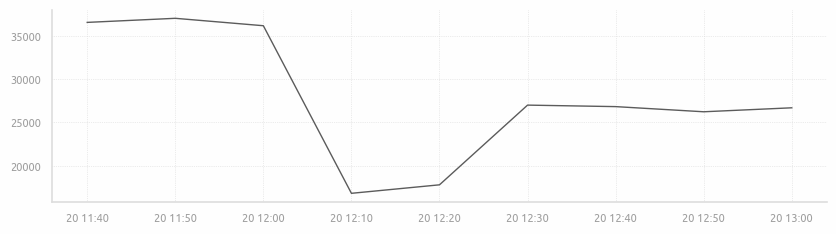

In [82]:
plt.plot(
    train.loc['2017-04-20 11:40:00':'2017-04-20 13:00:00'].index,
    train.loc['2017-04-20 11:40:00':'2017-04-20 13:00:00']['target1']
);

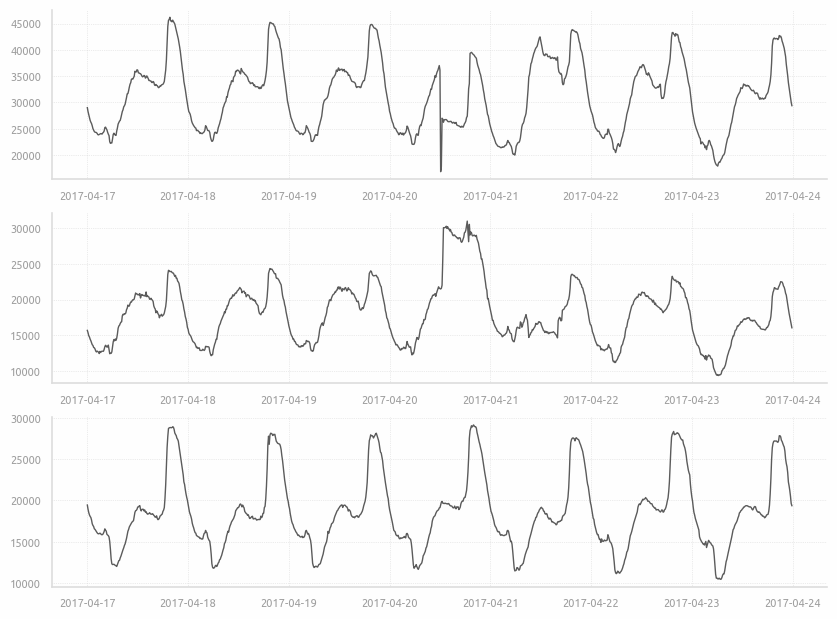

In [83]:
fig, ax = plt.subplots(3,1, figsize=(10, 7.5))

for i, v in enumerate(['target1', 'target2', 'target3']):
    ax[i].plot(
        train.loc['2017-04-17':'2017-04-23'].index,
        train.loc['2017-04-17':'2017-04-23'][v]
    );

In [84]:
train.loc['2017-04-20'].index.day_name()[0]

'Thursday'

##### Anomaly #3

index: 2017-05-31 11:30:00  
volatility: 438.955206

In [85]:
train['target1_volatility'].sort_values()

2017-04-27 01:40:00       0.000000
2017-05-24 17:50:00       0.000000
2017-07-25 18:00:00       0.000000
2017-05-25 12:20:00       0.000000
2017-05-25 15:20:00       0.000000
                          ...     
2017-07-04 12:30:00     334.726302
2017-05-31 11:30:00     438.955206
2017-04-20 12:30:00    2673.646637
2017-04-20 12:10:00    2862.029840
2017-04-01 00:00:00            NaN
Name: target1_volatility, Length: 17568, dtype: float64

In [86]:
train.loc['2017-05-31 11:15':'2017-05-31 11:55']

,temperature,humidity,windspeed,generaldiffuseflows,diffuseflows,target1,target2,target3,minute,hour,...,month,year_month,year_day,count_elmnts_by_day,is_Friday,is_Sunday,is_31,target1_diff,target1_returns,target1_volatility
2017-05-31 11:20:00,23.94,62.07,4.928,817.0,91.3,32029.37705,20504.02477,15391.09312,20,11,...,5,2017-05,2017-05-31,69,0,0,1,-805.77049,-2.453988,6.022056
2017-05-31 11:30:00,24.26,60.61,4.919,830.0,86.3,25318.81967,20574.61300,15618.46154,30,11,...,5,2017-05,2017-05-31,70,0,0,1,-6710.55738,-20.951258,438.955206
2017-05-31 11:40:00,24.42,60.71,4.923,846.0,84.3,27660.59016,20689.78328,15863.31984,40,11,...,5,2017-05,2017-05-31,71,0,0,1,2341.77049,9.249130,85.546402
2017-05-31 11:50:00,24.77,58.61,4.922,854.0,83.5,28957.37705,20760.37152,15845.82996,50,11,...,5,2017-05,2017-05-31,72,0,0,1,1296.78689,4.688211,21.979324


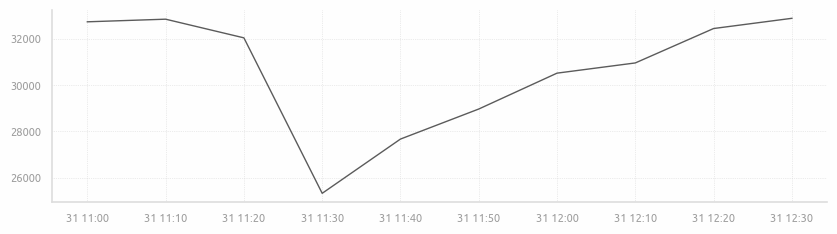

In [87]:
plt.plot(
    train.loc['2017-05-31 11:00':'2017-05-31 12:30'].index,
    train.loc['2017-05-31 11:00':'2017-05-31 12:30']['target1']
);

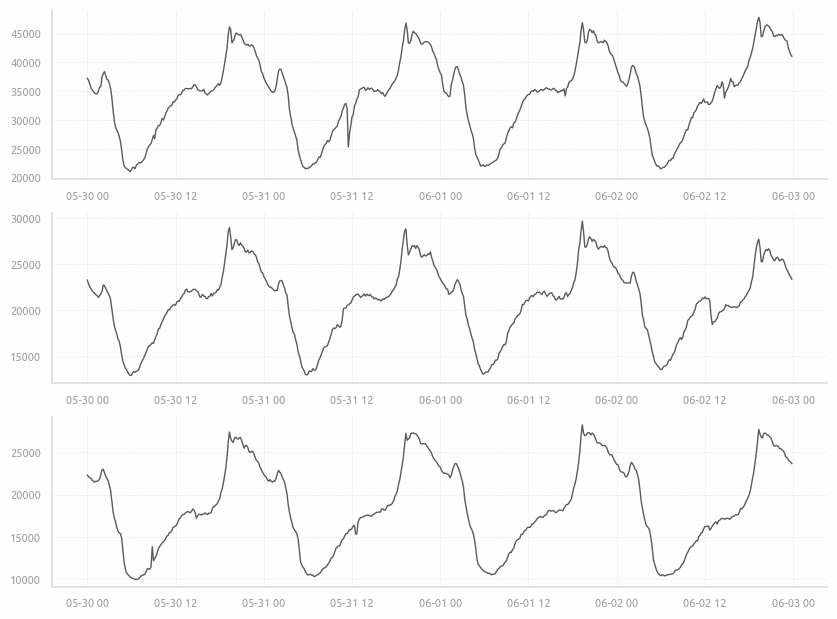

In [88]:
fig, ax = plt.subplots(3,1, figsize=(10, 7.5))

for i, v in enumerate(['target1', 'target2', 'target3']):
    ax[i].plot(
        train.loc['2017-05-30':'2017-06-02'].index,
        train.loc['2017-05-30':'2017-06-02'][v]
    );

## Autocorrelation

#### ACF - 40 period

In [89]:
acf40 = ts_acf_calculate(train['target1'], lags=40)

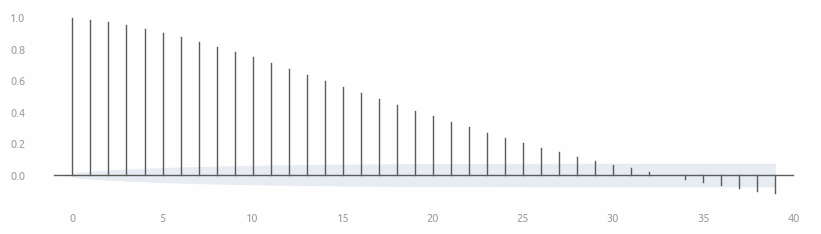

In [90]:
plot_acf(acf40)

In [91]:
ts_acf_last_significant_index(acf40[:, 1:])

29

#### ACF - 300 period

In [92]:
acf300 = ts_acf_calculate(train['target1'], lags=300)

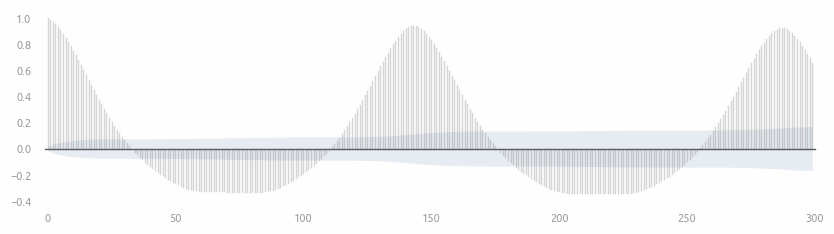

In [93]:
plot_acf(acf300, transparency_lines=0.25)

#### PACF - 40 period

In [94]:
pacf40 = ts_acf_calculate(train['target1'], lags=40, partial=True)

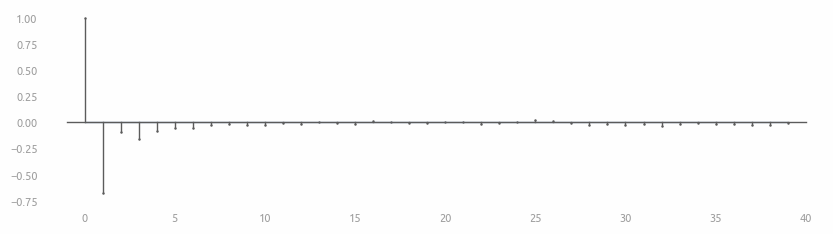

In [95]:
plot_acf(pacf40, scatter=True)

In [96]:
ts_acf_last_significant_index(pacf40[:, 1:])

10

### Scatterplots Matrix

No non-linear relationships

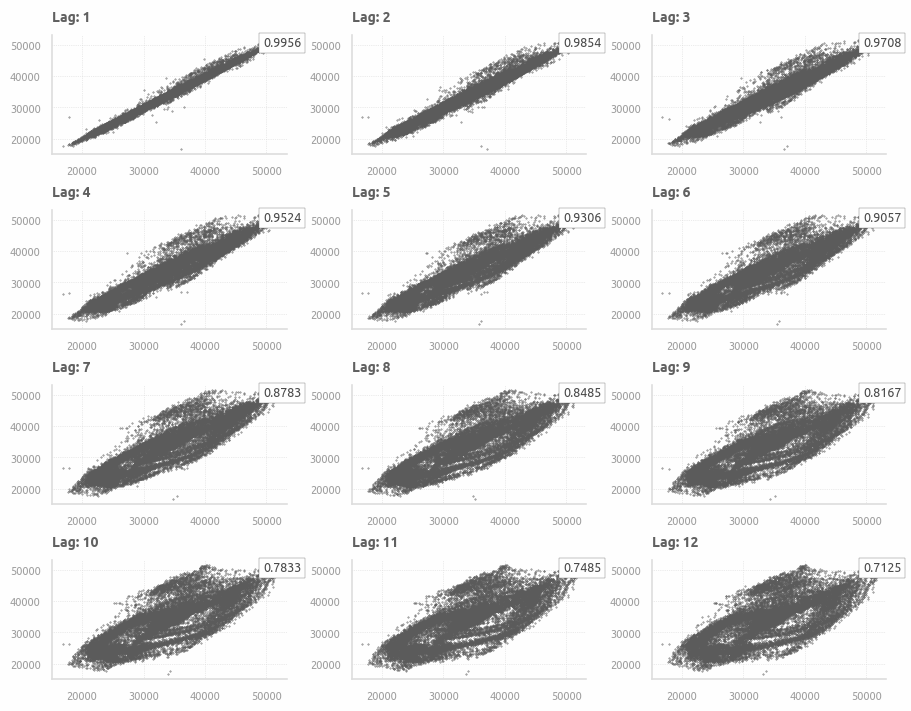

In [97]:
ts_scatterplot_matrix(
    train['target1'],
    lags=12, ncols=3, s=0.5, figsize=(9, 7))

In [98]:
scipy.stats.pearsonr(
    train['target1_diff'][2:],
    train['target1_diff'].shift(1)[2:]
)

PearsonRResult(statistic=0.6694636520696418, pvalue=0.0)

In [99]:
scipy.stats.pearsonr(
    train['target1_returns'][2:],
    train['target1_returns'].shift(1)[2:]
)

PearsonRResult(statistic=0.6448746527849827, pvalue=0.0)

In [100]:
scipy.stats.pearsonr(
    train['target1_volatility'][2:],
    train['target1_volatility'].shift(1)[2:]
)

PearsonRResult(statistic=0.04546577335696663, pvalue=1.6541052268138016e-09)

#### Predictors

### P

xt = (1 + pt)xt−1

In [101]:
train['p'] = train['target1'] / train['target1'].shift(1) - 1

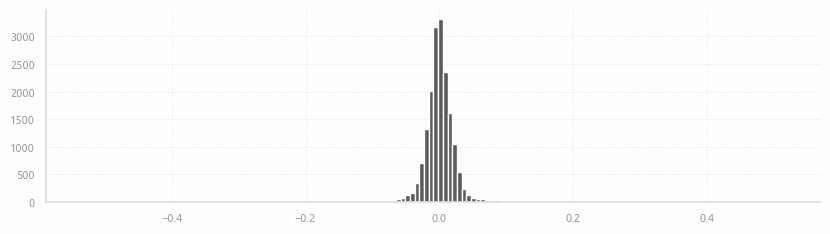

In [102]:
plt.hist(train['p'], bins=150);

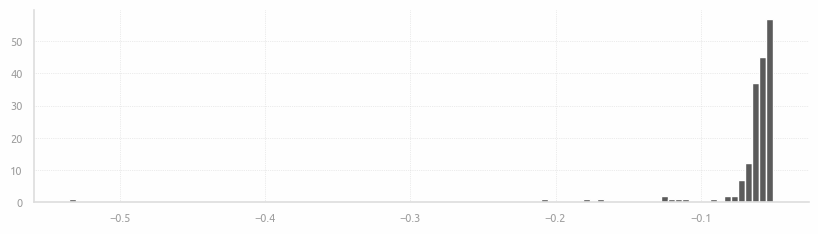

In [103]:
plt.hist(train.loc[train['p']<-0.05, 'p'], bins=100);

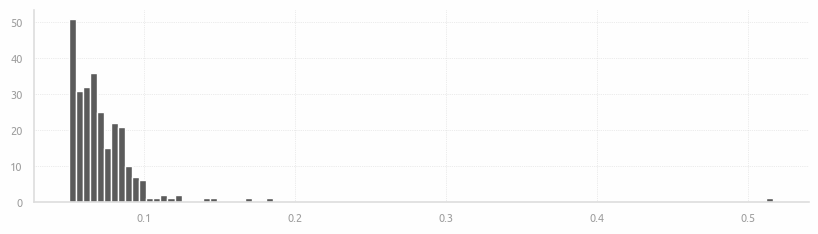

In [104]:
plt.hist(train.loc[train['p']>0.05, 'p'], bins=100);

## Feature Engineering

In [105]:
train.head(3)

,temperature,humidity,windspeed,generaldiffuseflows,diffuseflows,target1,target2,target3,minute,hour,...,year_month,year_day,count_elmnts_by_day,is_Friday,is_Sunday,is_31,target1_diff,target1_returns,target1_volatility,p
2017-04-01 00:00:00,16.76,86.2,0.075,0.029,0.108,28471.38859,16845.21385,17454.54545,0,0,...,2017-04,2017-04-01,1,0,0,0,NaN,NaN,NaN,NaN
2017-04-01 00:10:00,16.78,86.2,0.072,0.026,0.119,28099.37567,16566.59878,17192.72727,10,0,...,2017-04,2017-04-01,2,0,0,0,-372.01292,-1.306620,1.707256,-0.013066
2017-04-01 00:20:00,16.80,86.3,0.071,0.029,0.082,27640.55974,16101.01833,17070.54545,20,0,...,2017-04,2017-04-01,3,0,0,0,-458.81593,-1.632833,2.666144,-0.016328


#### Cumulative average of Target1

In [106]:
train['target1_cum_avg'] = \
    (train.groupby('day_of_year')['target1'].cumsum().values
     / train['count_elmnts_by_day'].values)

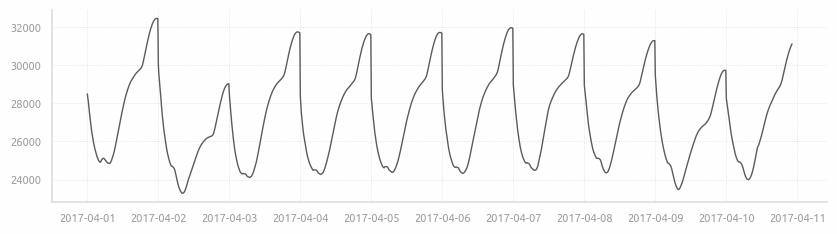

In [107]:
plt.plot(train['target1_cum_avg'][:143*10]);

In [108]:
scipy.stats.pearsonr(
    train['target1_cum_avg'].shift()[1:],
    train['target1'][1:]
)

PearsonRResult(statistic=0.5418520351586386, pvalue=0.0)

In [109]:
scipy.stats.pearsonr(
    train['target1_cum_avg'].shift()[1:],
    train['target1_cum_avg'][1:]
)

PearsonRResult(statistic=0.99638060909279, pvalue=0.0)

### Save Session

### Execution time

In [110]:
print(f'Execution time: {stopwatch.stop(start)}')

Execution time: 0:01:11
